In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [15, 12]

font = {'size'   : 15, }
axes = {'labelsize': 'large', 'titlesize': 'large'}

mpl.rc('font', **font)
mpl.rc('axes', **axes)

import pandas as pd
import data_utils


In [10]:
# Paths to data csvs
wd = "/home/behzad/Documents/barnes_lab/cplusplus_software/speed_test/repressilator/cpp"
data_dir = wd + "/output/two_species_big_3/Population_0"
distances_path = data_dir + "/distances.csv"
eigenvalues_init_path = data_dir + "/eigenvalues_init_state.csv"
eigenvalues_end_path = data_dir + "/eigenvalues_end_state.csv"

model_space_report_path = data_dir + "/model_space_report.csv"




In [11]:
# Load dataframes
distances_df = pd.read_csv(distances_path)
eig_init_df = pd.read_csv(eigenvalues_init_path)
eig_end_df = pd.read_csv(eigenvalues_end_path)

# Make distances numeric
distances_df = data_utils.distances_pre_processing(distances_df)


# Add columns indicating check results and summary stats
eig_end_df = data_utils.make_max_eig(eig_end_df)
eig_end_df = data_utils.all_negative_eigs(eig_end_df)
eig_end_df = data_utils.all_real_eigs(eig_end_df)
eig_end_df = data_utils.all_positive_eigs(eig_end_df)


eig_init_df = data_utils.make_max_eig(eig_init_df)
eig_init_df = data_utils.all_negative_eigs(eig_init_df)
eig_init_df = data_utils.all_real_eigs(eig_init_df)
eig_init_df = data_utils.all_positive_eigs(eig_init_df)

print("Total distances: ", len(distances_df))
print("Total eigenvalues init state: ", len(eig_init_df))
print("Total eigenvalues end state: ", len(eig_end_df))


Total distances:  101700
Total eigenvalues init state:  101700
Total eigenvalues end state:  101700


In [12]:
end_real_part_sims = eig_end_df.loc[eig_end_df['all_real_eigs'] == True]
end_complex_sims = eig_end_df.loc[eig_end_df['all_real_eigs'] == False]
end_negative_part_sims = eig_end_df.loc[eig_end_df['all_negative_eigs'] == True]
end_positive_part_sims = eig_end_df.loc[eig_end_df['all_positive_eigs'] == True]

init_real_part_sims = eig_init_df.loc[eig_init_df['all_real_eigs'] == True]
init_complex_sims = eig_init_df.loc[eig_init_df['all_real_eigs'] == False]
init_negative_part_sims = eig_init_df.loc[eig_init_df['all_negative_eigs'] == True]
init_positive_part_sims = eig_init_df.loc[eig_init_df['all_positive_eigs'] == True]

print("")
# Number of sims that are all real parts
print("Init state with only real parts: ", len(init_real_part_sims))
print("End state with only real parts: ", len(end_real_part_sims))
print("")
# Number sims with only real eigen values
print("Init state with all negative real parts: ", len(init_negative_part_sims))
print("End state with all negative real parts: ", len(end_negative_part_sims))
print("")
# Number of sims with all positive parts
print("Init state all positive real parts: ", len(init_positive_part_sims))
print("End state all positive real parts: ", len(end_positive_part_sims))


print(end_positive_part_sims['all_positive_eigs'])


Init state with only real parts:  39424
End state with only real parts:  33005

Init state with all negative real parts:  63097
End state with all negative real parts:  59735

Init state all positive real parts:  2997
End state all positive real parts:  0
Series([], Name: all_positive_eigs, dtype: bool)


### Correlation between init state leading eig magnitude and reaching full term?

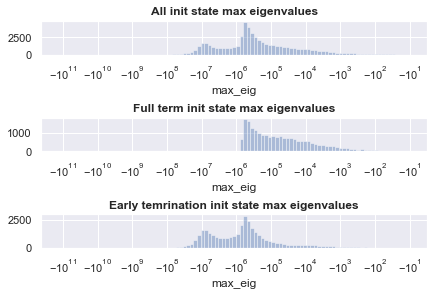

In [13]:
# Generate bins
n_bins=100
min_val = min(eig_init_df['max_eig'])
max_val =-10
bin_signs = np.linspace(min_val, max_val, n_bins)

logbins = np.logspace(np.log10(abs(min_val)),np.log10(abs(max_val)), n_bins)
logbins = [np.sign(bin_signs[idx])*(abs(x)) for idx, x in enumerate(logbins)]


eig_init_df_full_term = eig_init_df.loc[eig_init_df['integ_error'].isnull()]
eig_init_df_early_term = eig_init_df.loc[~eig_init_df['integ_error'].isnull()]

f, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True)
sns.distplot(eig_init_df['max_eig'], kde=False, bins=logbins, ax=ax1)
sns.distplot(eig_init_df_full_term['max_eig'], kde=False, bins=logbins, ax=ax2)
sns.distplot(eig_init_df_early_term['max_eig'], kde=False, bins=logbins, ax=ax3)

ax1.set_title('All init state max eigenvalues', fontweight="bold")
ax2.set_title('Full term init state max eigenvalues', fontweight="bold")
ax3.set_title('Early temrination init state max eigenvalues', fontweight="bold")

ax1.set_xscale('symlog')
ax2.set_xscale('symlog')
ax3.set_xscale('symlog')

# ax3.set(xlim=[None, -10])
plt.show()

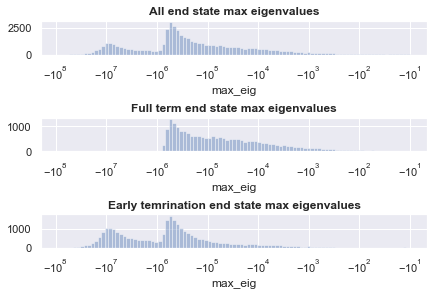

In [14]:
# Generate bins
n_bins=100
min_val = min(eig_end_df['max_eig'])
max_val = -10
bin_signs = np.linspace(min_val, max_val, n_bins)

logbins = np.logspace(np.log10(abs(min_val)),np.log10(abs(max_val)), n_bins)
logbins = [np.sign(bin_signs[idx])*(abs(x)) for idx, x in enumerate(logbins)]


eig_end_df_full_term = eig_end_df.loc[eig_end_df['integ_error'].isnull()]
eig_end_df_early_term = eig_end_df.loc[~eig_end_df['integ_error'].isnull()]

f, (ax1, ax2, ax3) = plt.subplots(3, 1, constrained_layout=True)
sns.distplot(eig_end_df['max_eig'], kde=False, bins=logbins, ax=ax1)
sns.distplot(eig_end_df_full_term['max_eig'], kde=False, bins=logbins, ax=ax2)
sns.distplot(eig_end_df_early_term['max_eig'], kde=False, bins=logbins, ax=ax3)

ax1.set_title('All end state max eigenvalues', fontweight="bold")
ax2.set_title('Full term end state max eigenvalues', fontweight="bold")
ax3.set_title('Early temrination end state max eigenvalues', fontweight="bold")

ax1.set_xscale('symlog')
ax2.set_xscale('symlog')
ax3.set_xscale('symlog')

# ax3.set(xlim=[None, -10])
plt.show()

### Correlation between init state eigenvalues and standard deviation

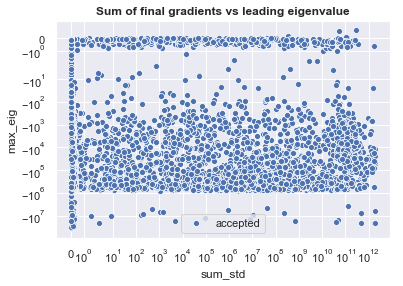

In [15]:
joint_df = pd.merge(left=eig_init_df, right=distances_df, how='inner', on=['sim_idx', 'batch_num', 'model_ref'])
joint_df.reset_index()

joint_df['sum_std'] = joint_df['d2'] + joint_df['d5']
joint_df['sum_grad'] = joint_df['d1'] + joint_df['d4']

full_term_sims = joint_df.loc[joint_df['integ_error'].isnull()]

# Full term simulations only
ax = sns.scatterplot(x='sum_std', y='max_eig', data=full_term_sims, label='accepted')
# ax = sns.scatterplot(x='sum_grad', y='max_eig', data=full_term_sims_not_acc, label='rejected')

ax.set(xscale='symlog', yscale='symlog')
# ax.set(xlim=-1, ylim=(None, 1))
ax.set_title('Sum of final gradients vs leading eigenvalue', 
             fontweight="bold")
plt.show()